In [212]:
import argparse
import numpy as np
import tensorflow.compat.v2 as tf
import yaml
#from absl import app
from matplotlib import pyplot as plt, patches
#from nam_train import FLAGS
#from neural_additive_models import graph_builder, data_utils
tf.enable_v2_behavior()
import os.path as osp
import tensorflow as tf
from textwrap import wrap
import joblib
import shap

In [213]:
label_file = 'potec_feature_names.yaml'
with open(label_file, 'r') as file:
    features_name_potec = yaml.safe_load(file)
xlabel = 'Feature contribution'

## BQ correct

In [214]:
postfix = '_all_bq_correct.joblib'

In [215]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

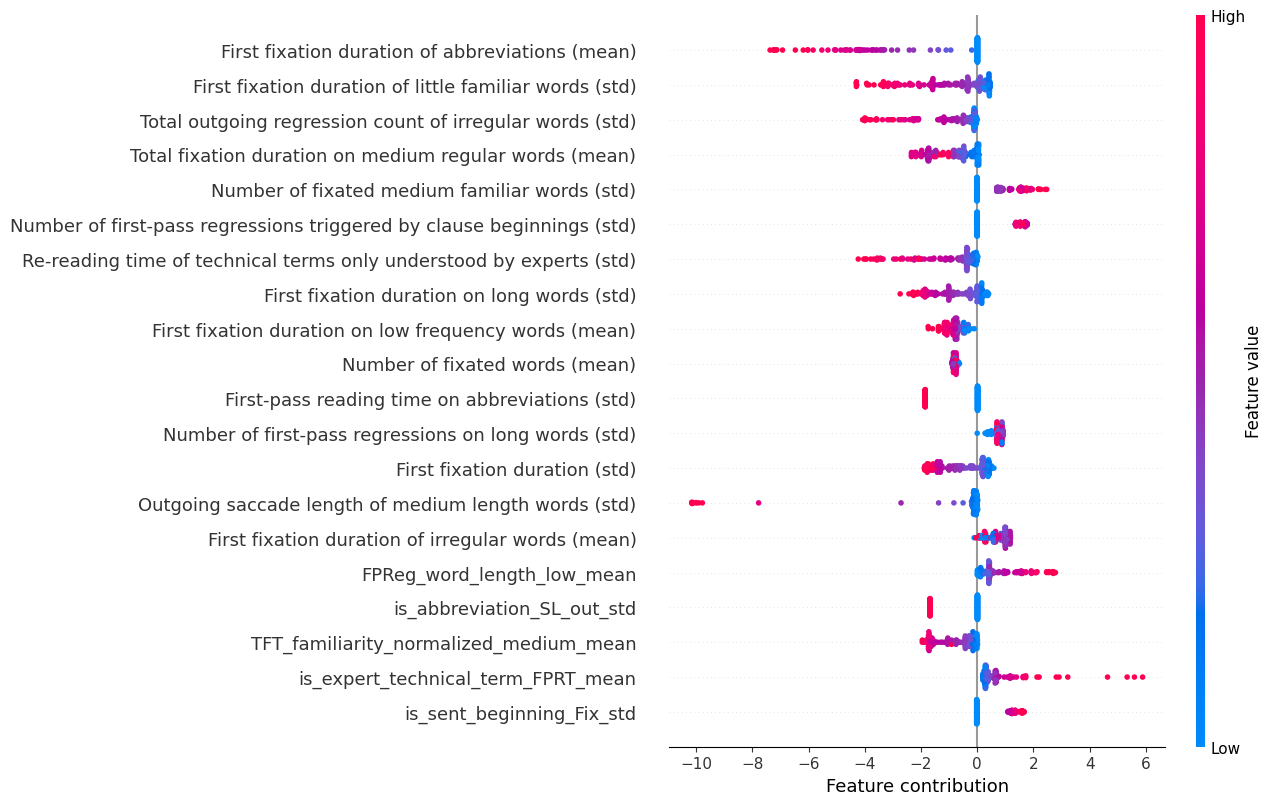

In [216]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

['First fixation duration of abbreviations (mean)'
 'First fixation duration of little familiar words (std)'
 'Total outgoing regression count of irregular words (std)'
 'Total fixation duration on medium regular words (mean)'
 'Number of fixated medium familiar words (std)'
 'Number of first-pass regressions triggered by clause beginnings (std)'
 'Re-reading time of technical terms only understood by experts (std)'
 'First fixation duration on long words (std)'
 'First fixation duration on low frequency words (mean)'
 'Number of fixated words (mean)'
 'First-pass reading time on abbreviations (std)'
 'Number of first-pass regressions on long words (std)'
 'First fixation duration (std)'
 'Outgoing saccade length of medium length words (std)'
 'First fixation duration of irregular words (mean)']


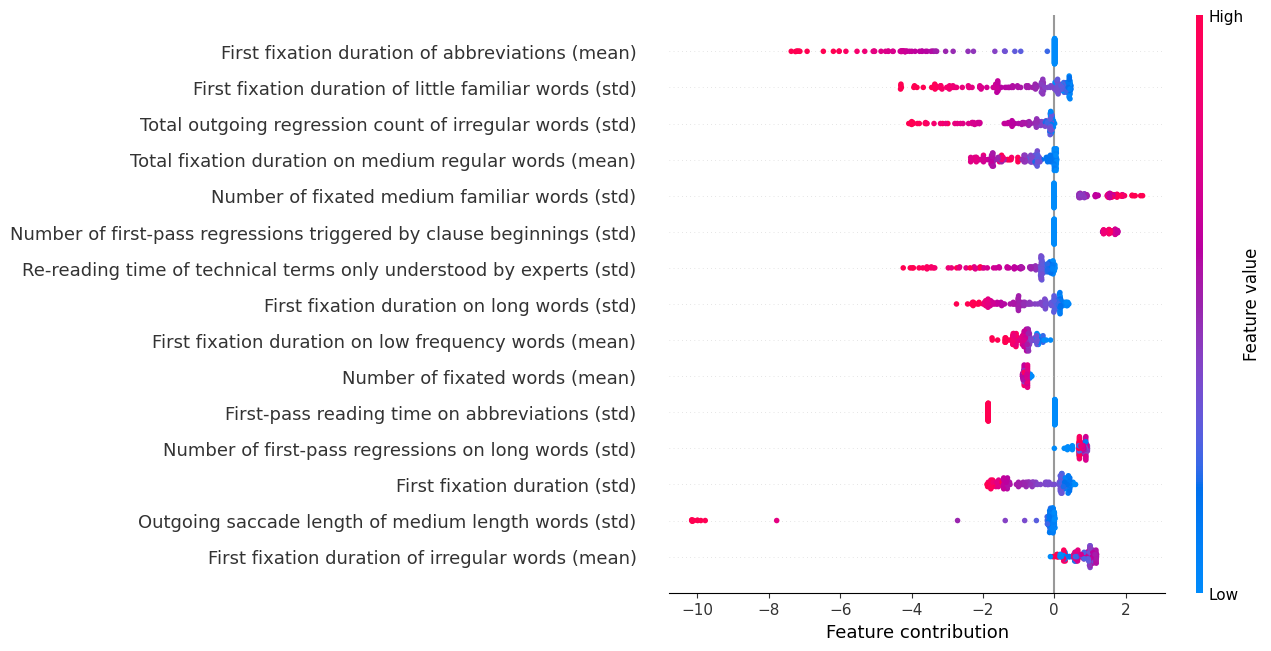

In [217]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

['First fixation duration of abbreviations (mean)'
 'First fixation duration of little familiar words (std)'
 'Total outgoing regression count of irregular words (std)'
 'Total fixation duration on medium regular words (mean)'
 'Number of fixated medium familiar words (std)'
 'Number of first-pass regressions triggered by clause beginnings (std)'
 'Re-reading time of technical terms only understood by experts (std)'
 'First fixation duration on long words (std)'
 'First fixation duration on low frequency words (mean)'
 'Number of fixated words (mean)']


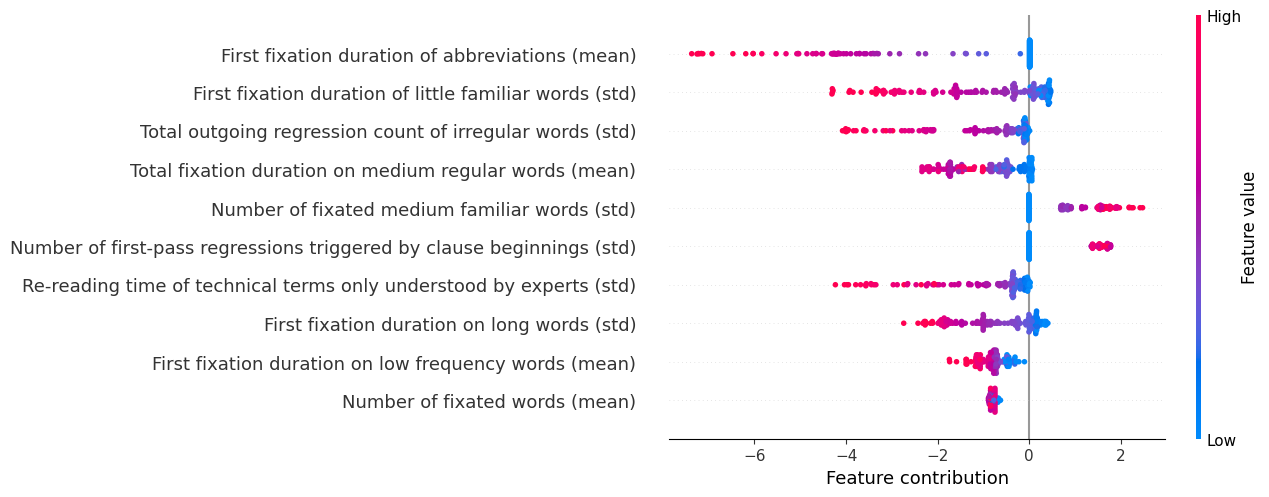

In [218]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

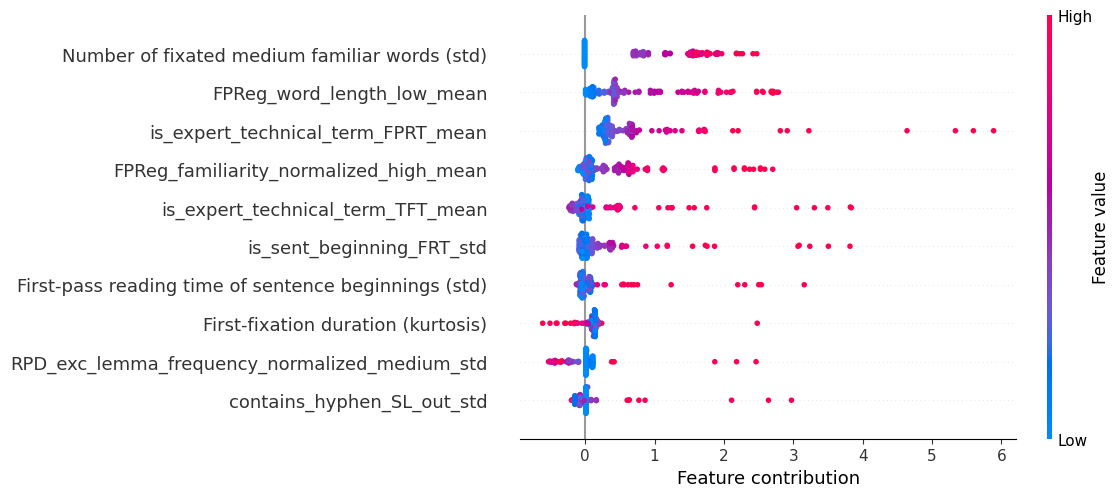

In [219]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

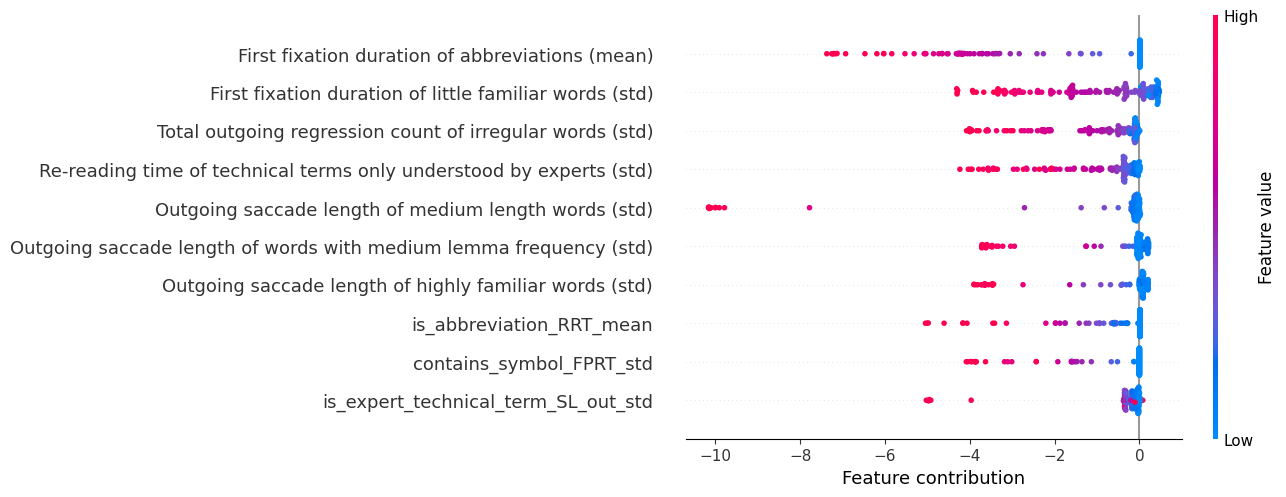

In [220]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

## Text comprehension

In [221]:
postfix = '_all_tq_correct.joblib'

In [222]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

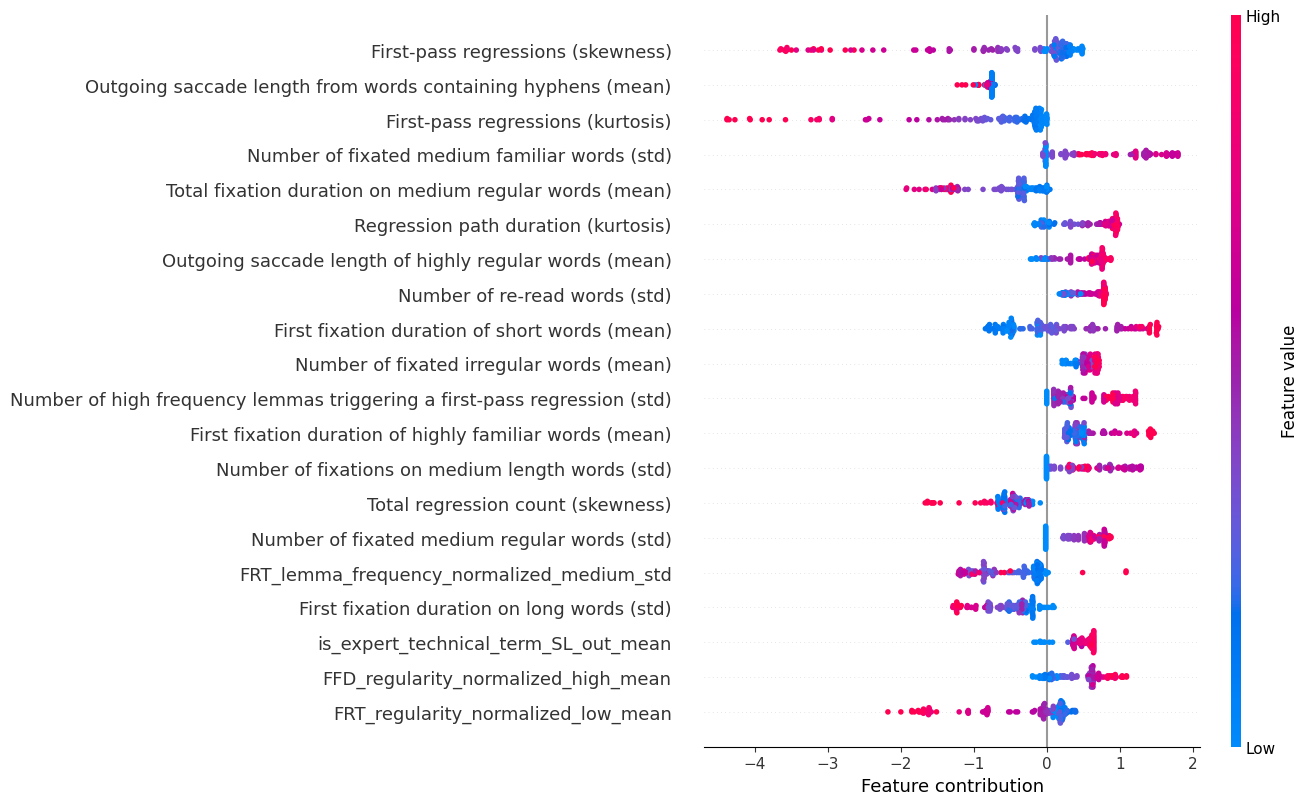

In [223]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

['First-pass regressions (skewness)'
 'Outgoing saccade length from words containing hyphens (mean)'
 'First-pass regressions (kurtosis)'
 'Number of fixated medium familiar words (std)'
 'Total fixation duration on medium regular words (mean)'
 'Regression path duration (kurtosis)'
 'Outgoing saccade length of highly regular words (mean)'
 'Number of re-read words (std)'
 'First fixation duration of short words (mean)'
 'Number of fixated irregular words (mean)'
 'Number of high frequency lemmas triggering a first-pass regression (std)'
 'First fixation duration of highly familiar words (mean)'
 'Number of fixations on medium length words (std)'
 'Total regression count (skewness)'
 'Number of fixated medium regular words (std)']


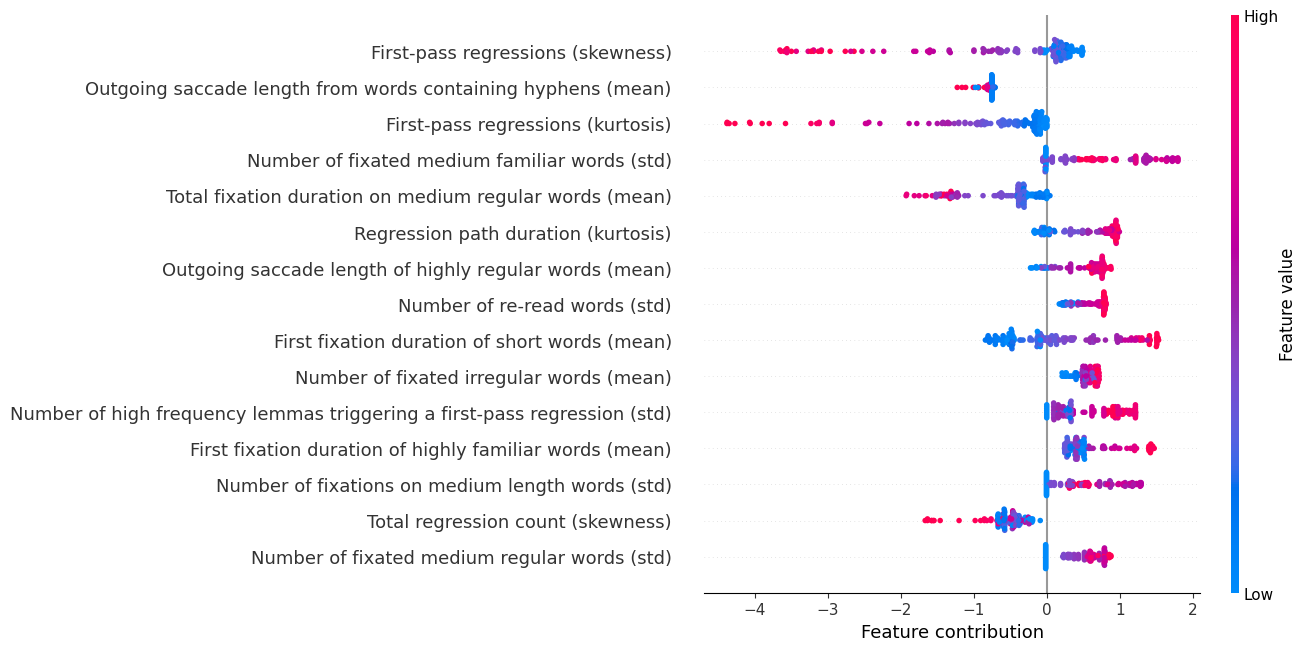

In [224]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

['First-pass regressions (skewness)'
 'Outgoing saccade length from words containing hyphens (mean)'
 'First-pass regressions (kurtosis)'
 'Number of fixated medium familiar words (std)'
 'Total fixation duration on medium regular words (mean)'
 'Regression path duration (kurtosis)'
 'Outgoing saccade length of highly regular words (mean)'
 'Number of re-read words (std)'
 'First fixation duration of short words (mean)'
 'Number of fixated irregular words (mean)']


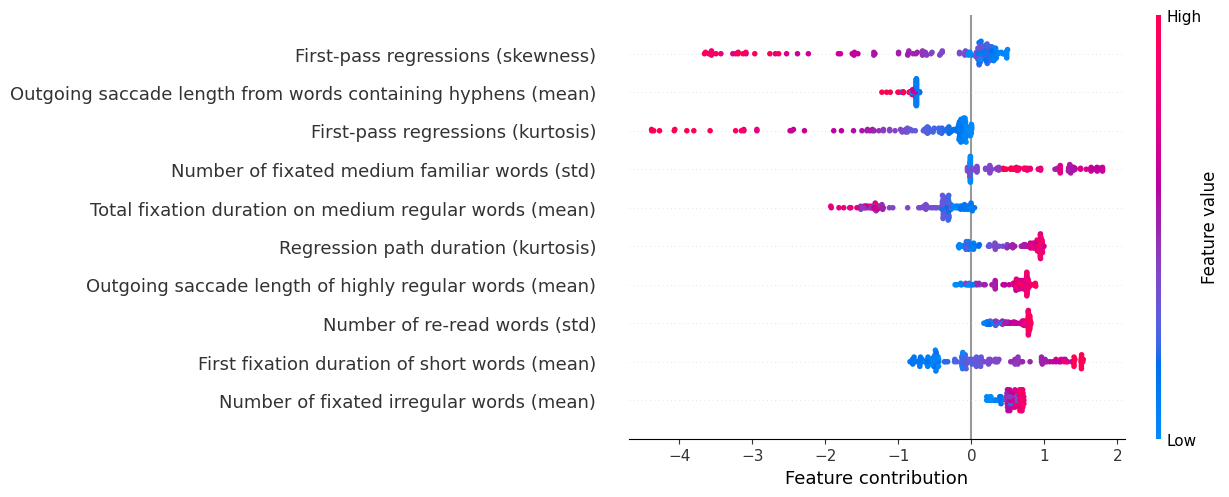

In [225]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

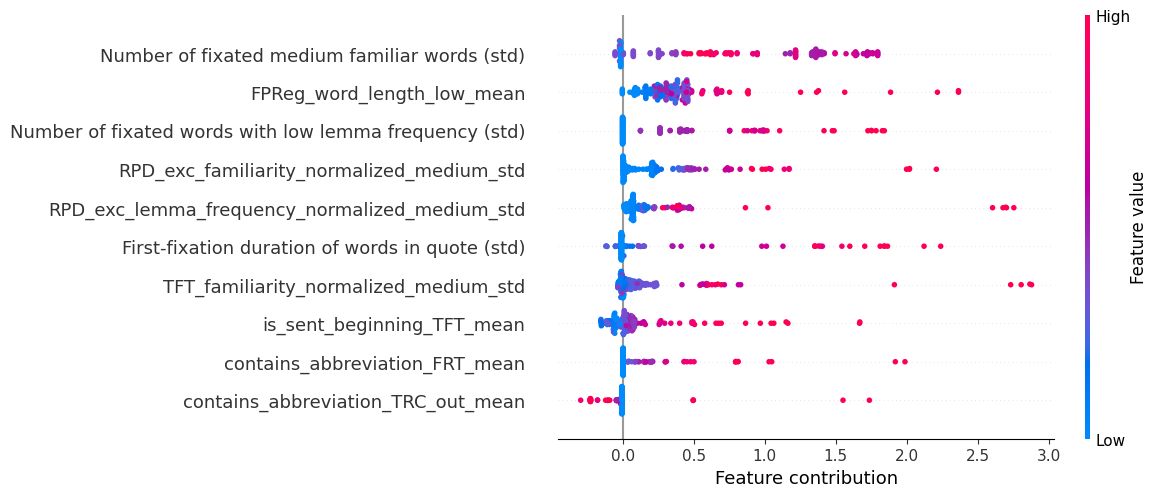

In [226]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

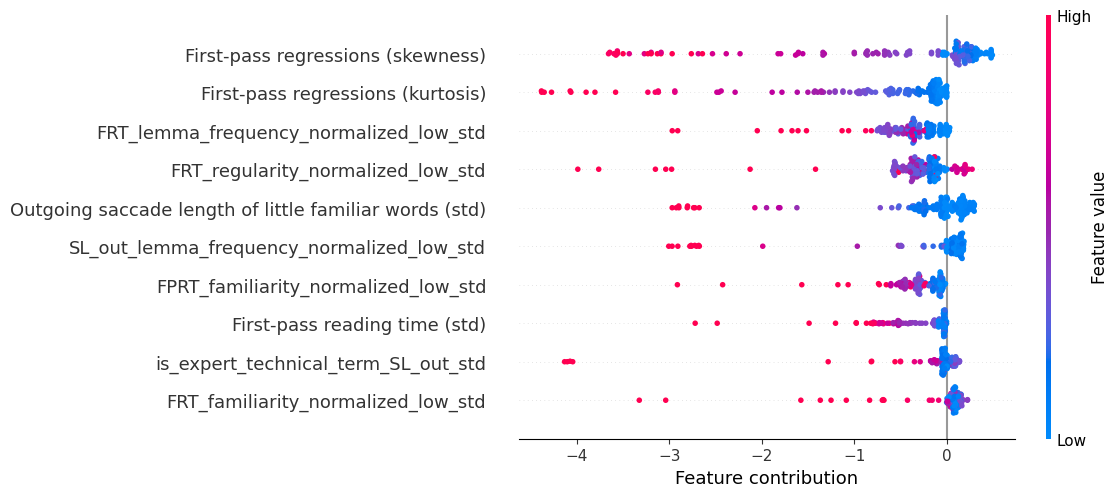

In [227]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

## expert vs. non-expert

In [228]:
postfix = '_expert_cls_label.joblib'

In [229]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

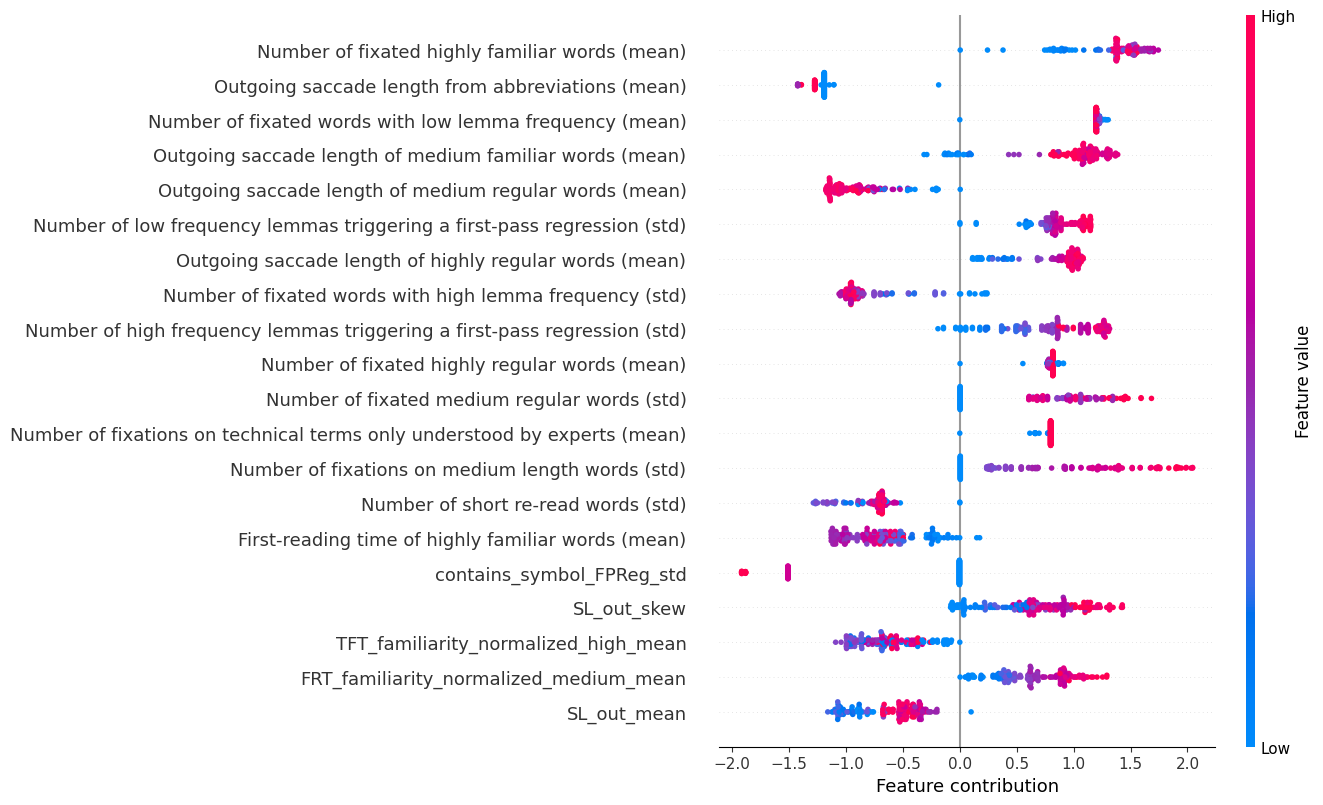

In [230]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

['Number of fixated highly familiar words (mean)'
 'Outgoing saccade length from abbreviations (mean)'
 'Number of fixated words with low lemma frequency (mean)'
 'Outgoing saccade length of medium familiar words (mean)'
 'Outgoing saccade length of medium regular words (mean)'
 'Number of low frequency lemmas triggering a first-pass regression (std)'
 'Outgoing saccade length of highly regular words (mean)'
 'Number of fixated words with high lemma frequency (std)'
 'Number of high frequency lemmas triggering a first-pass regression (std)'
 'Number of fixated highly regular words (mean)'
 'Number of fixated medium regular words (std)'
 'Number of fixations on technical terms only understood by experts (mean)'
 'Number of fixations on medium length words (std)'
 'Number of short re-read words (std)'
 'First-reading time of highly familiar words (mean)']


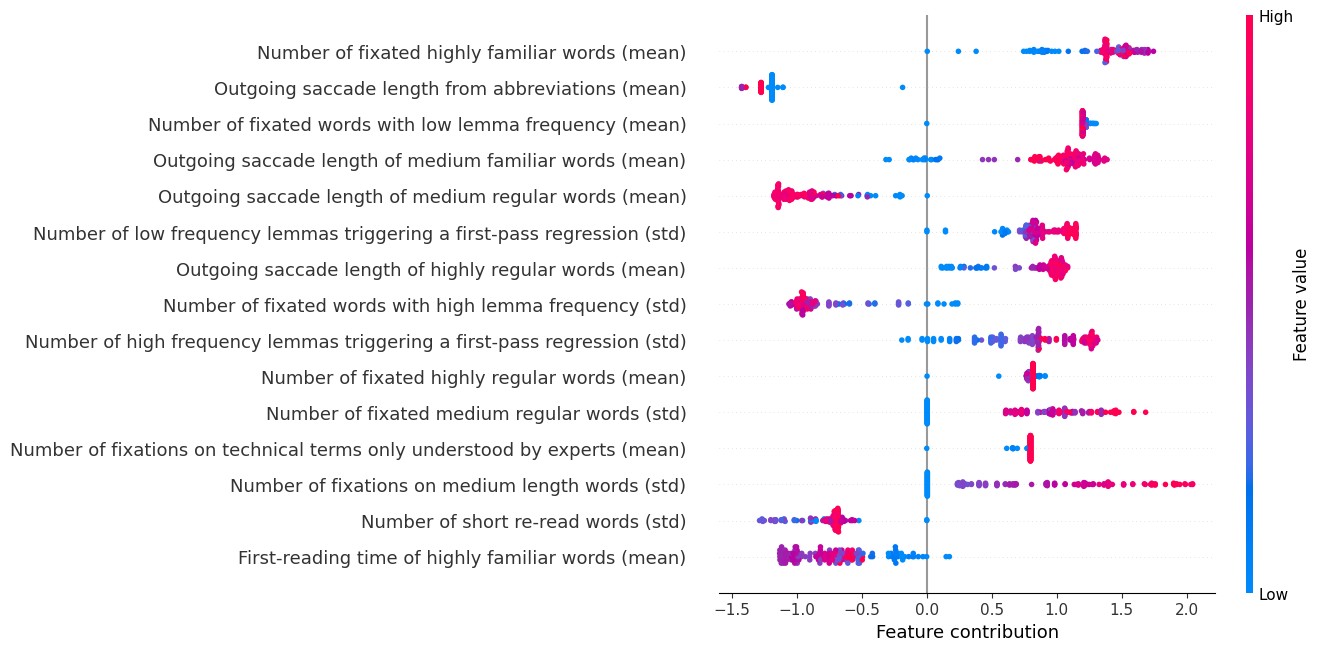

In [231]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

['Number of fixated highly familiar words (mean)'
 'Outgoing saccade length from abbreviations (mean)'
 'Number of fixated words with low lemma frequency (mean)'
 'Outgoing saccade length of medium familiar words (mean)'
 'Outgoing saccade length of medium regular words (mean)'
 'Number of low frequency lemmas triggering a first-pass regression (std)'
 'Outgoing saccade length of highly regular words (mean)'
 'Number of fixated words with high lemma frequency (std)'
 'Number of high frequency lemmas triggering a first-pass regression (std)'
 'Number of fixated highly regular words (mean)']


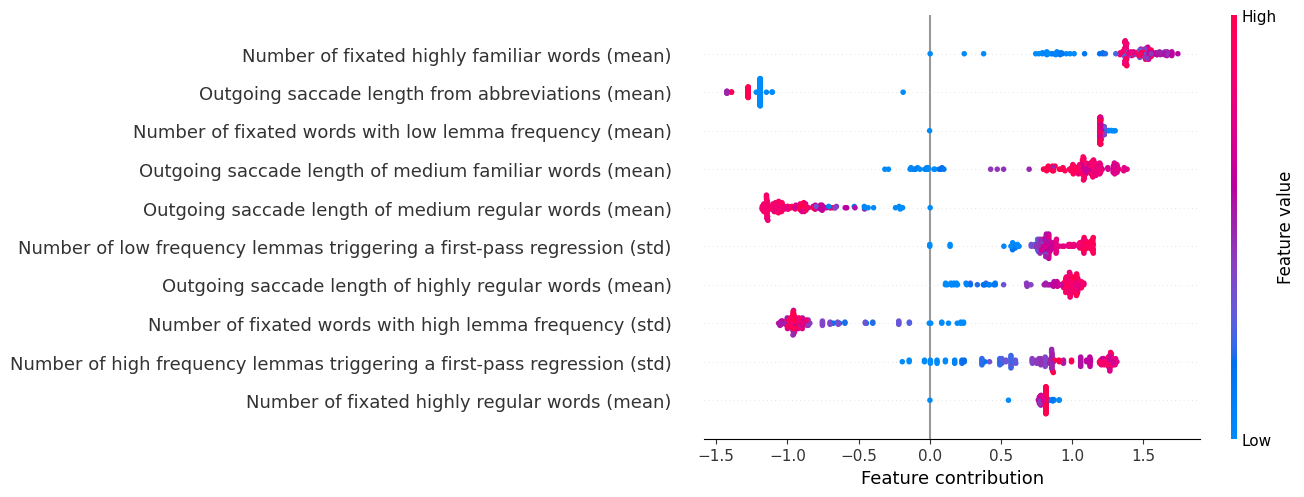

In [232]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')
print(feature_names[use_feature_ids])

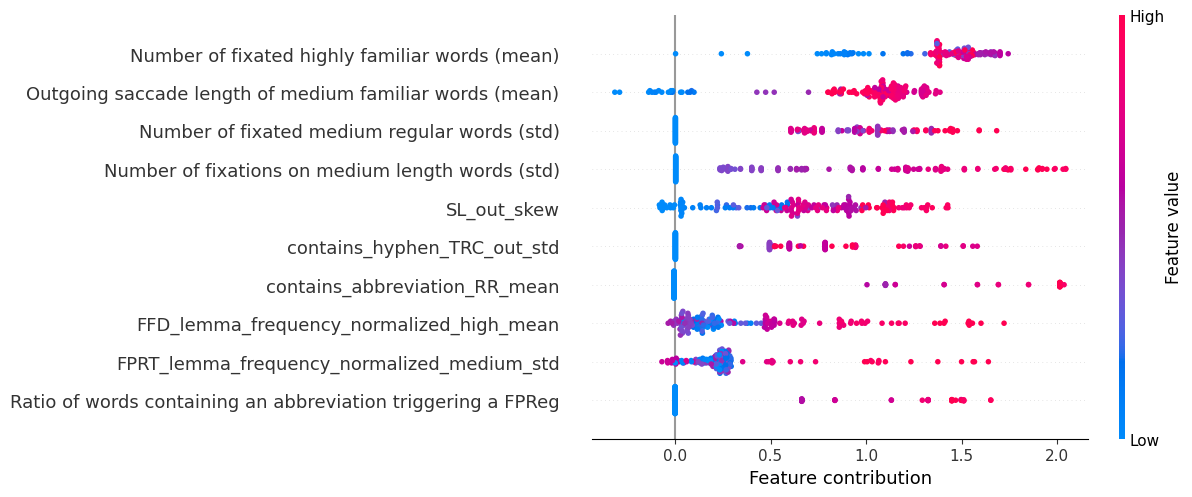

In [233]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

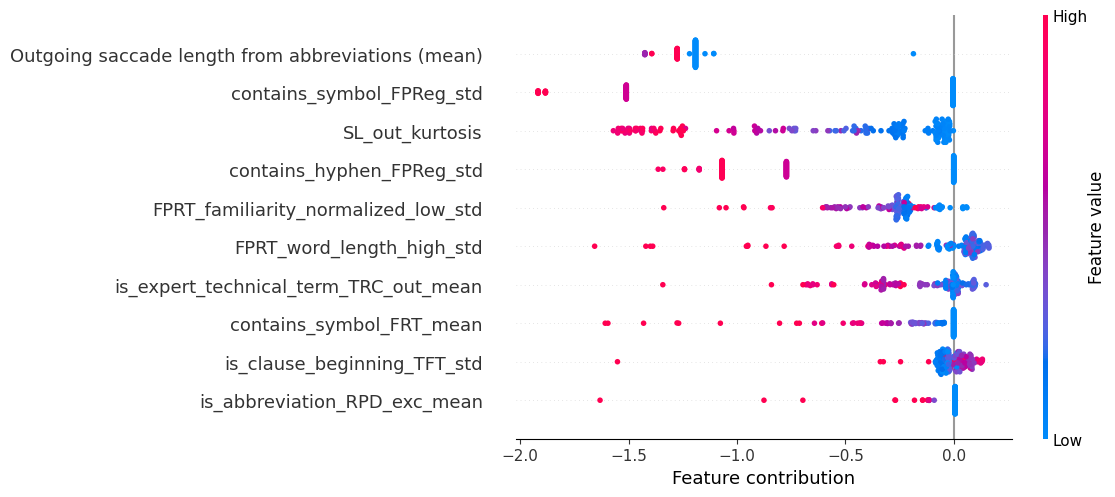

In [234]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')